## Solar Power Prediction using Linear Regression Model

Importing modules

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Dataset

In [329]:
df = pd.read_csv('solarpowergeneration.csv')
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


Performing Data Preprocessing

In [330]:
df.shape

(4213, 21)

In [331]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [332]:
# Check for the missing values
df.isnull().sum()

,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


In [333]:
# Check duplicate values
df.duplicated().sum()

0

###Since the dataset has no missing and duplicate values no intial preprocssing is required

Plotting the distribution of power output

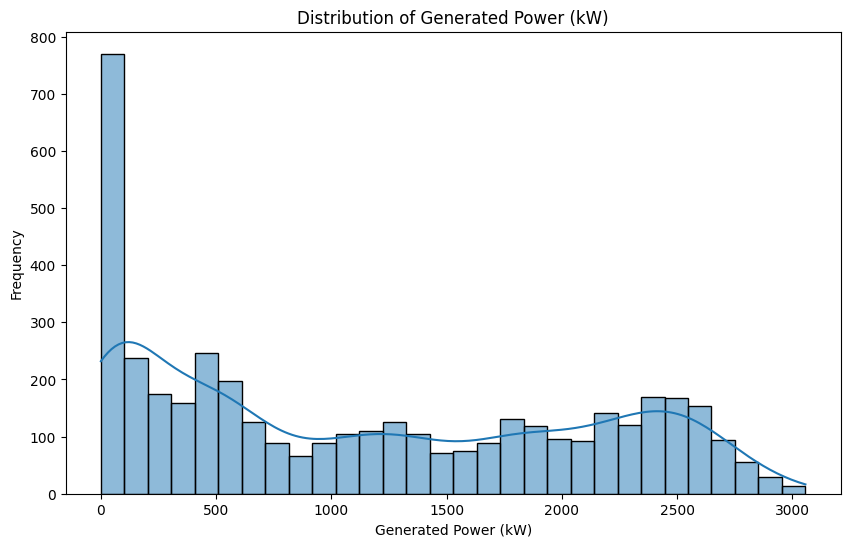

In [334]:
plt.figure(figsize=(10, 6))
sns.histplot(df['generated_power_kw'], bins=30, kde=True)
plt.title('Distribution of Generated Power (kW)')
plt.xlabel('Generated Power (kW)')
plt.ylabel('Frequency')
plt.show()


###Exploratory Data Analysis

Creating correaltion Matrix and ploting a heatmap for it

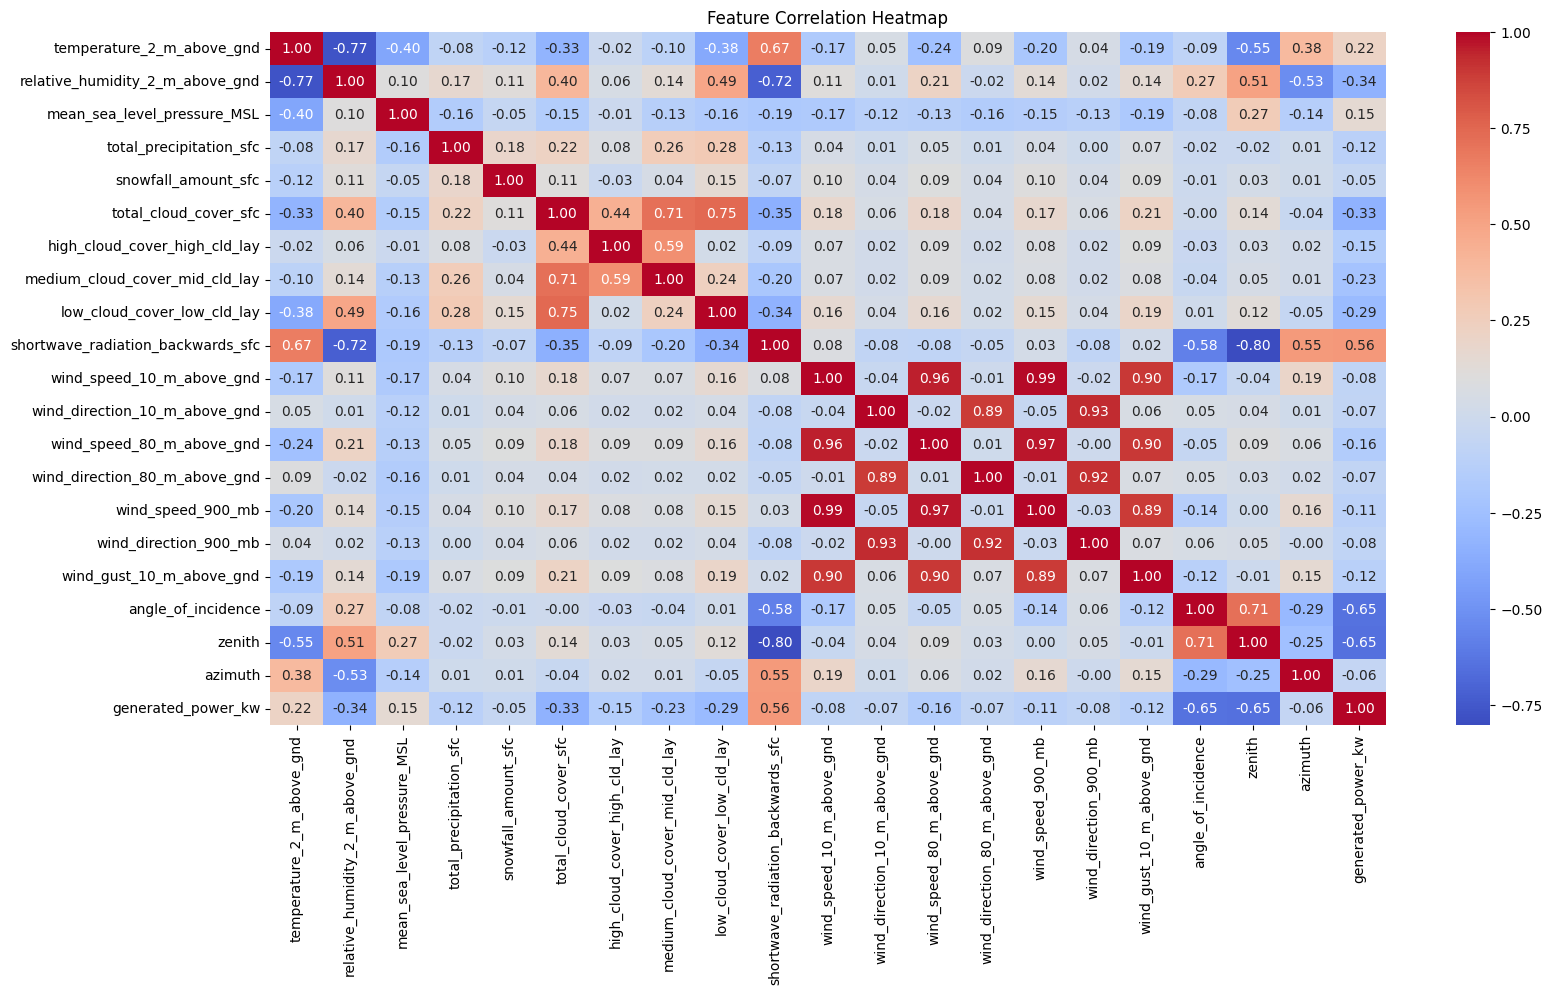

In [335]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


Printing the variable pairs with high correlation

In [336]:
threshold = 0.75

corr_matrix = df.corr()
corr_pairs = corr_matrix.unstack()
high_corr_pairs = corr_pairs[(abs(corr_pairs) > threshold) & (corr_pairs > 0)]
high_corr_pairs = high_corr_pairs.sort_values(ascending=False)

print("High correlating variable pairs:")
print(high_corr_pairs)

High correlating variable pairs:
temperature_2_m_above_gnd          temperature_2_m_above_gnd            1.000000
wind_direction_10_m_above_gnd      wind_direction_10_m_above_gnd        1.000000
azimuth                            azimuth                              1.000000
zenith                             zenith                               1.000000
angle_of_incidence                 angle_of_incidence                   1.000000
wind_gust_10_m_above_gnd           wind_gust_10_m_above_gnd             1.000000
wind_direction_900_mb              wind_direction_900_mb                1.000000
wind_speed_900_mb                  wind_speed_900_mb                    1.000000
wind_direction_80_m_above_gnd      wind_direction_80_m_above_gnd        1.000000
relative_humidity_2_m_above_gnd    relative_humidity_2_m_above_gnd      1.000000
wind_speed_80_m_above_gnd          wind_speed_80_m_above_gnd            1.000000
generated_power_kw                 generated_power_kw                   1.00

Bivariate analysis

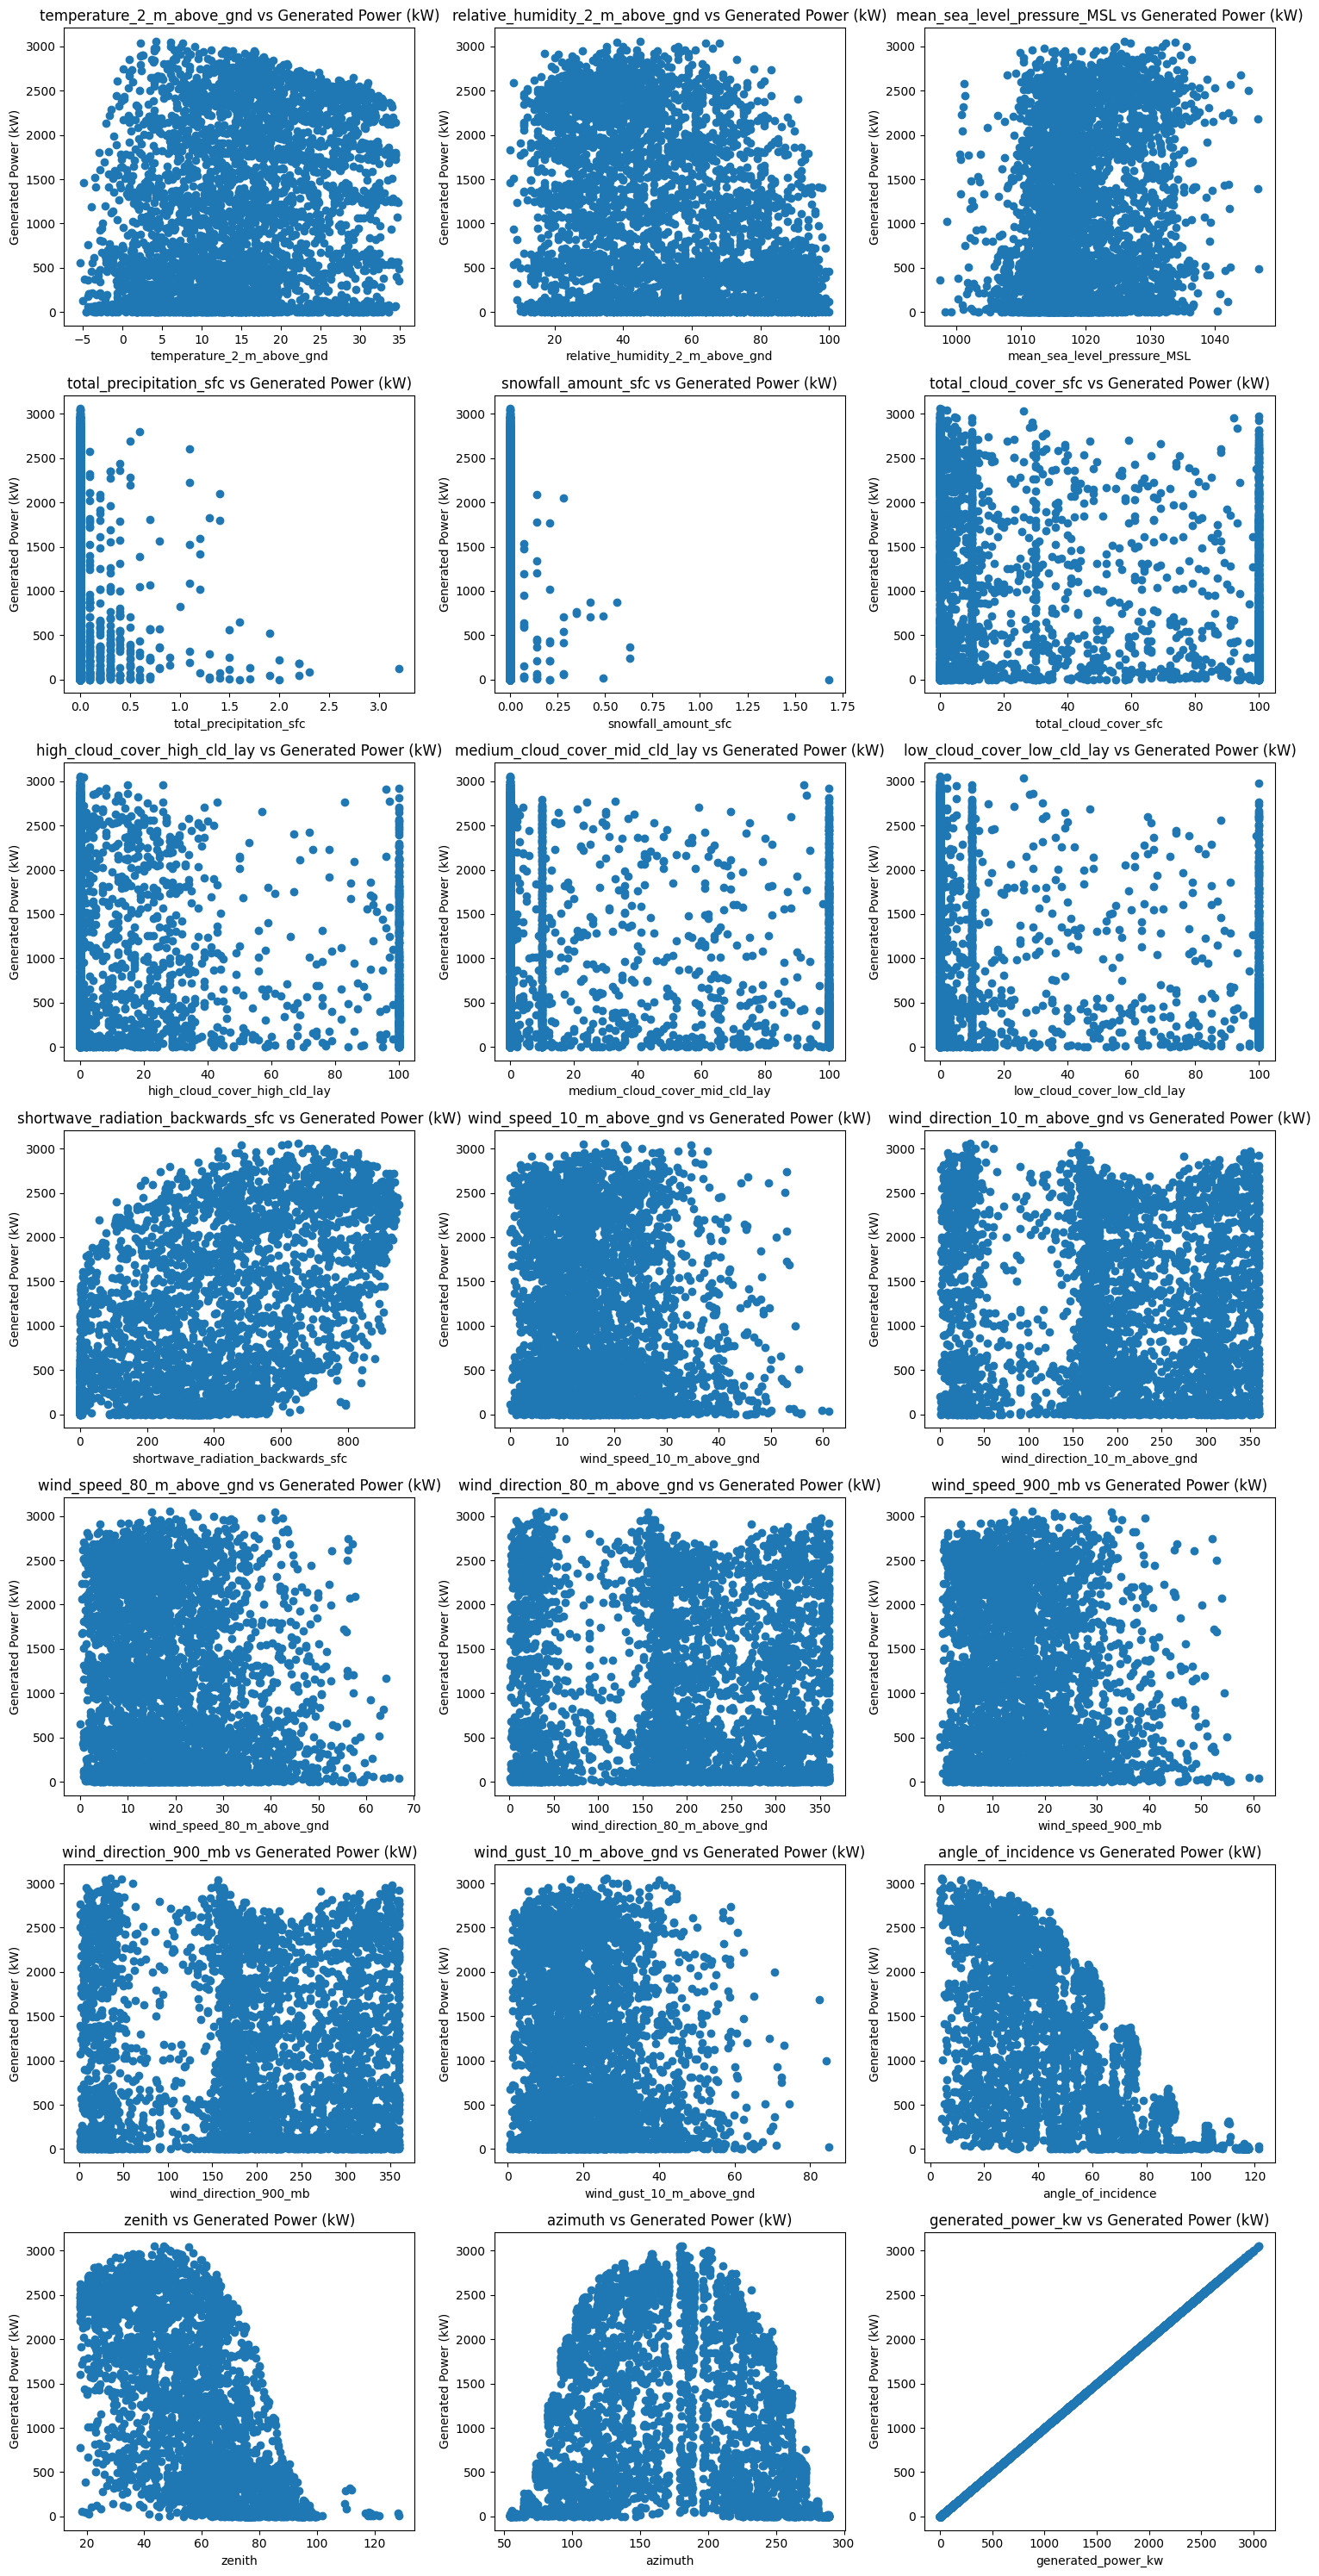

In [337]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    plt.scatter(df[column], df['generated_power_kw'])
    plt.title(f'{column} vs Generated Power (kW)')
    plt.xlabel(column)
    plt.ylabel('Generated Power (kW)')
plt.tight_layout()
plt.show()

 Handling Outliers

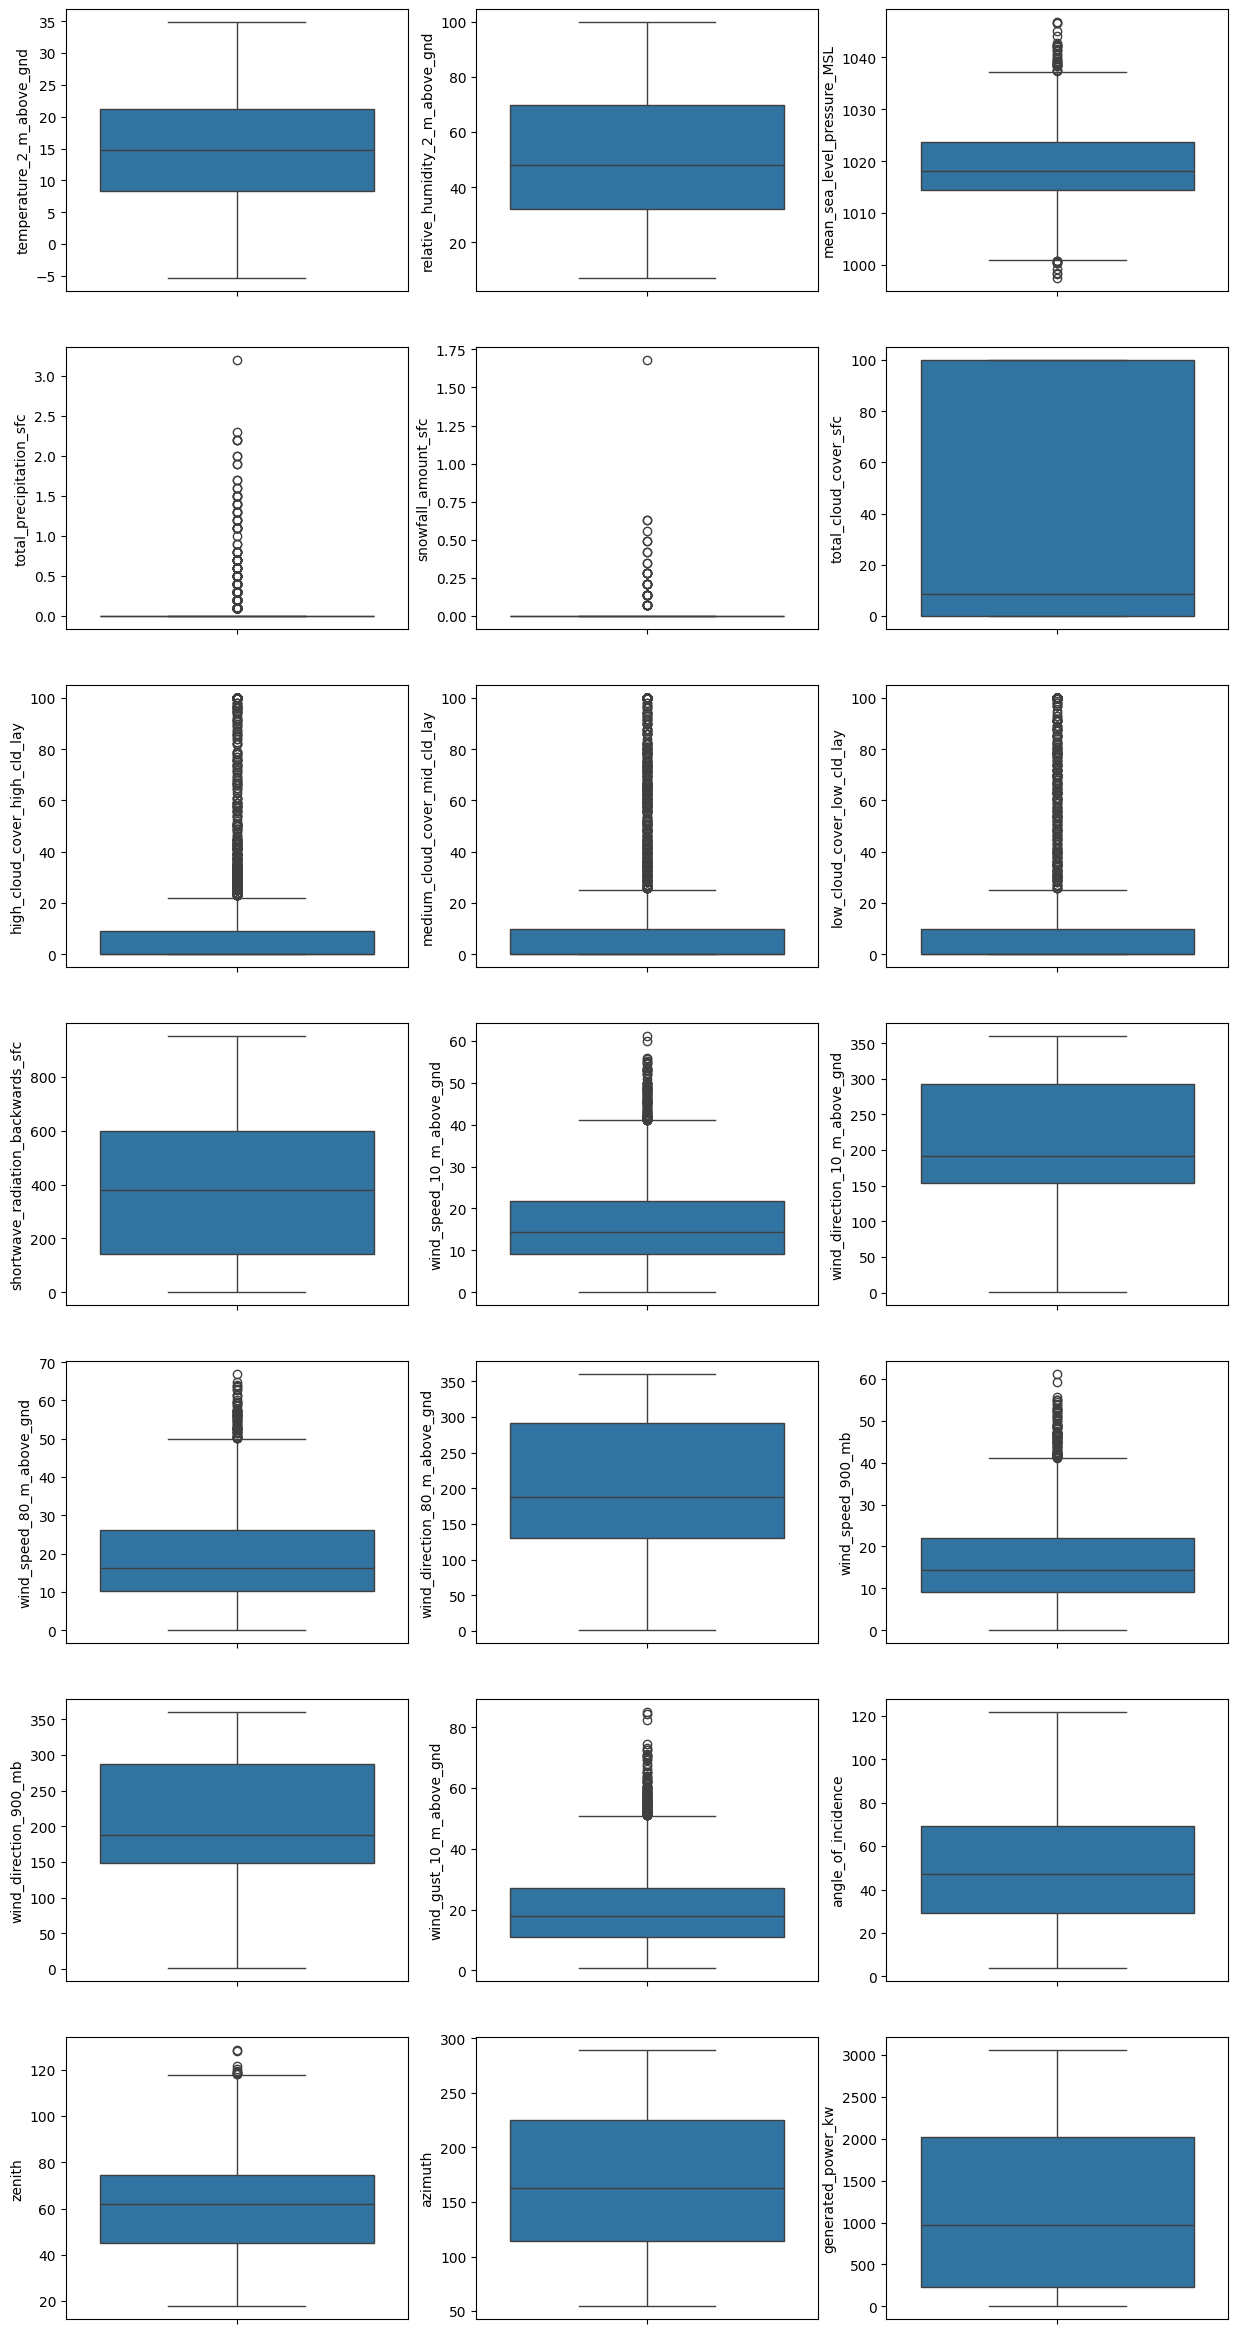

In [338]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(df[column])
plt.show()

In [339]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for feature in df.select_dtypes(include=['float64', 'int64']).columns:
    df[feature] = df[feature].clip(lower=lower_bound[feature], upper=upper_bound[feature])

print("Outliers have been treated using IQR method with capping.")

Outliers have been treated using IQR method with capping.


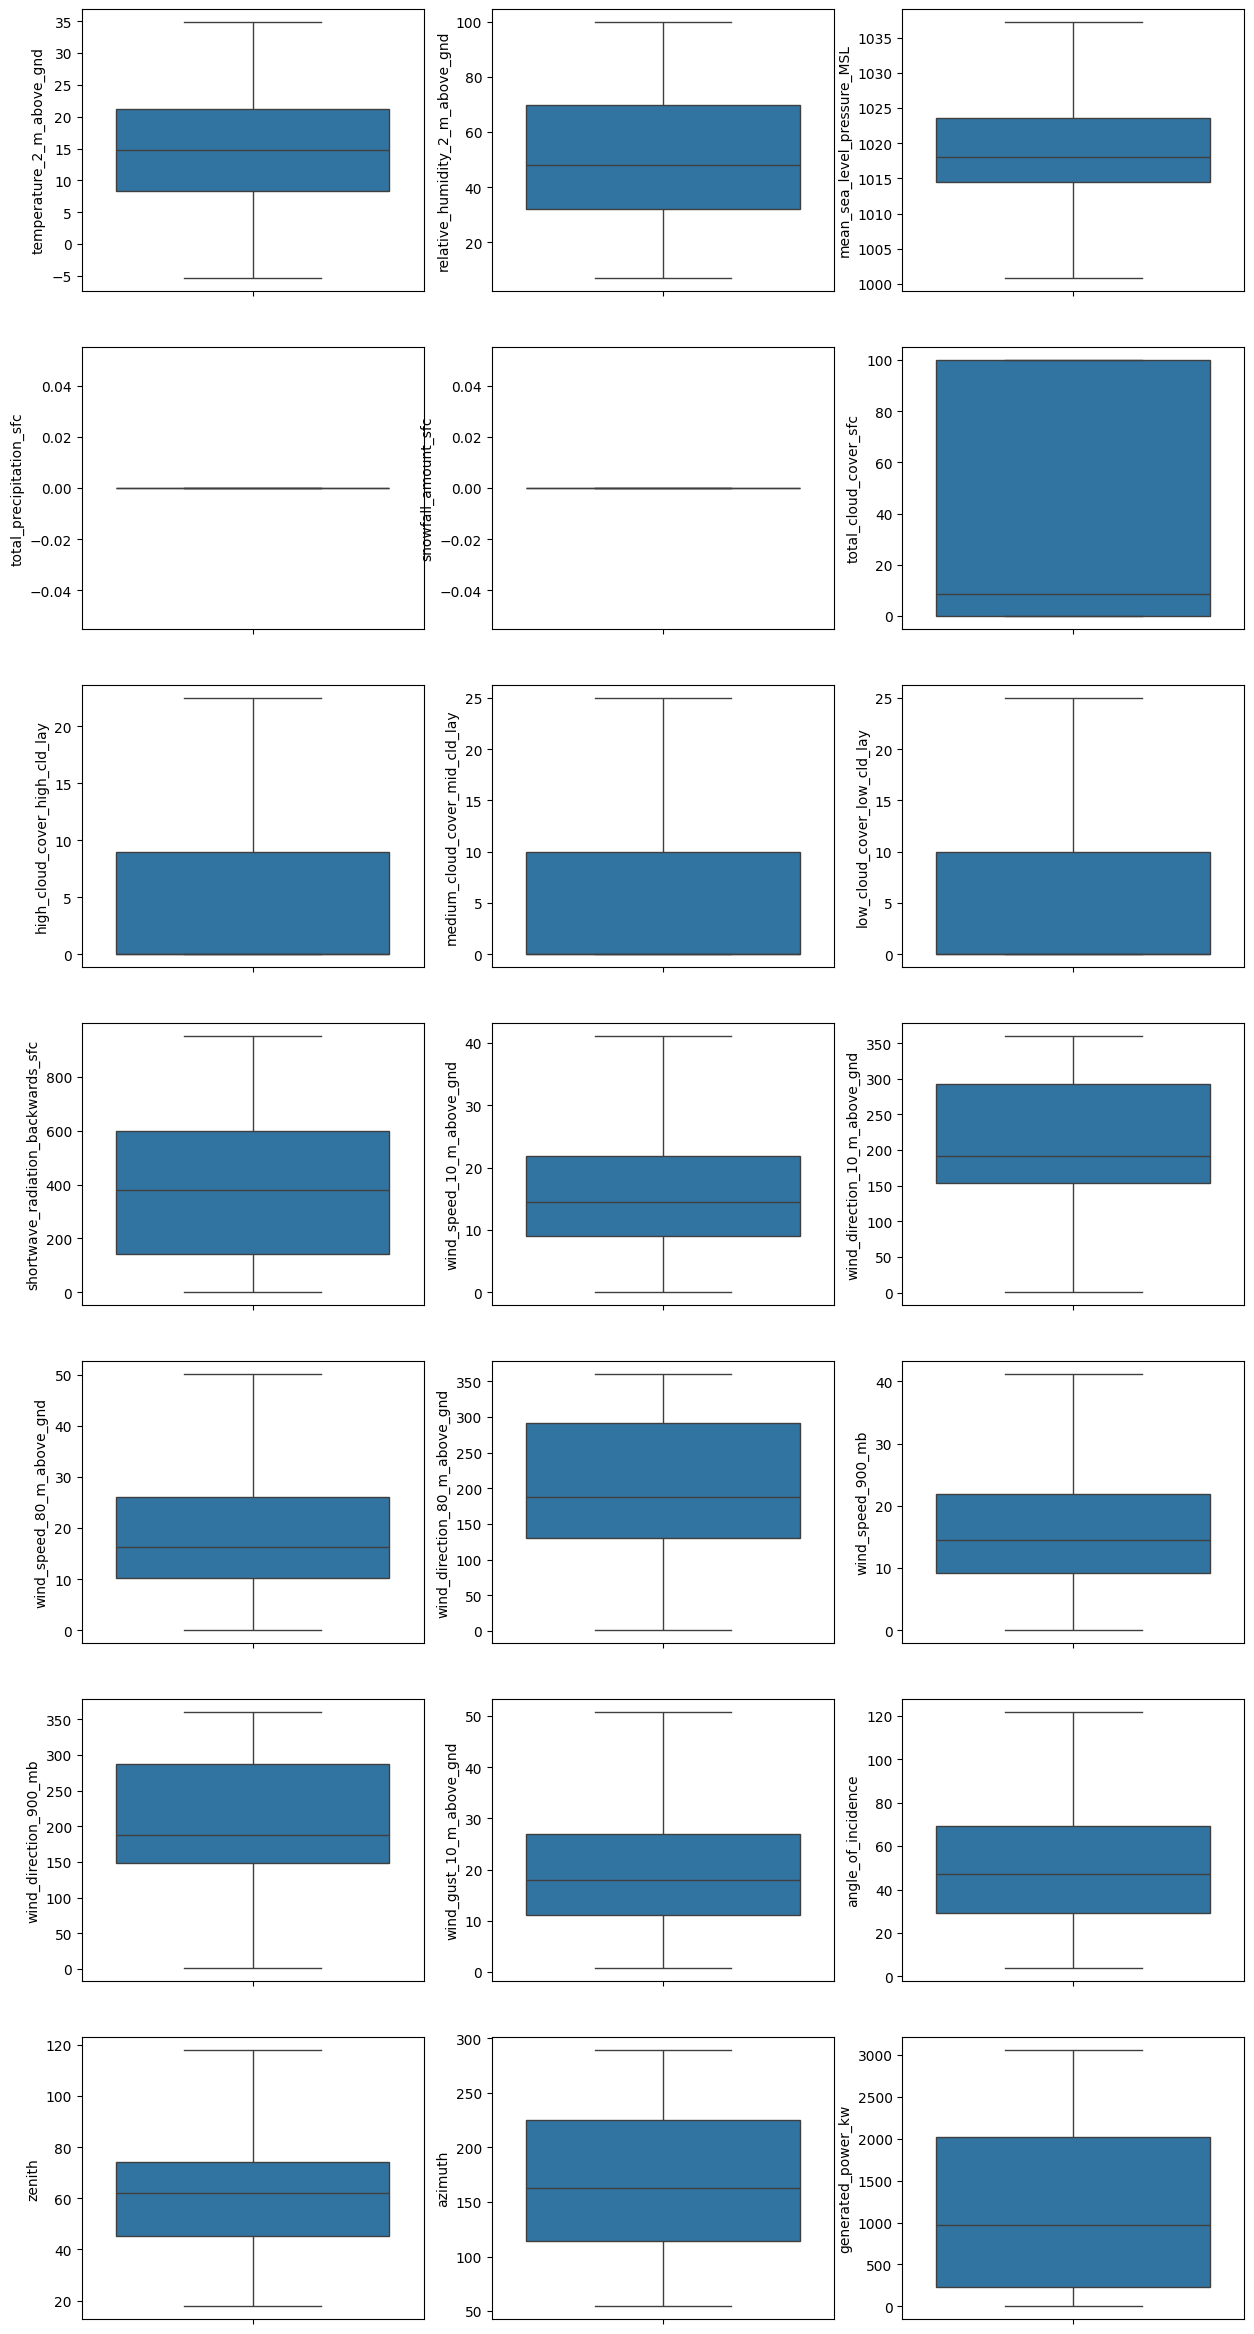

In [340]:
# outliers after handling it
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(df[column])
plt.show()

Creating the Linear Regresiion model

In [341]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [342]:
#spliting target and features
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']

In [343]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [344]:
#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [345]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [346]:
# Evaluate the model - test
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

Mean Absolute Error on Test Set: 385.4446828021914


In [347]:
# Evaluate the model on the training set
y_pred_train = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error on Train Set: {mae_train}")

Mean Absolute Error on Train Set: 392.8470404490051


In [348]:
# Compute R² score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)


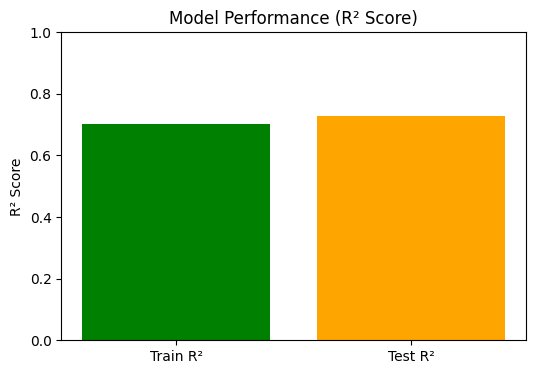

Train R² Score: 0.7011086311604038
Test R² Score: 0.7293618471609269


In [349]:
# Bar plot for R² scores
plt.figure(figsize=(6, 4))
plt.bar(["Train R²", "Test R²"], [r2_train, r2_test], color=["green", "orange"])
plt.ylim(0, 1)
plt.ylabel("R² Score")
plt.title("Model Performance (R² Score)")
plt.show()

print(f"Train R² Score: {r2_train}")
print(f"Test R² Score: {r2_test}")

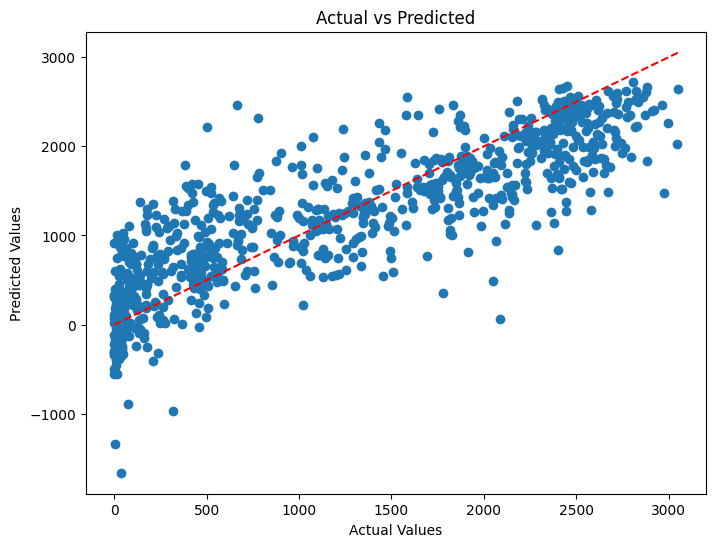

In [350]:
#residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


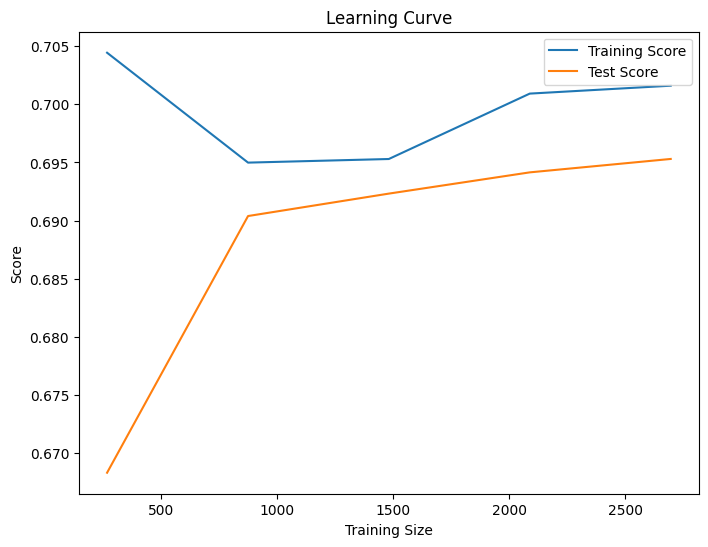

In [351]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test Score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.show()

###Week1 updates:

Week1 summary:

In the Week 1 of the project, I performed exploratory data analysis to gain insights into the dataset and prepare it for model development.

Key tasks accomplished :

1)The dataset was loaded, and it was analyzed using methods .shape, .describe().

2)Check for missing values and duplicates, indicating no missing or duplicate entries.

3)A histogram was plotted to examine the distribution of the target variable, generated_power_kw

IMPROVEMENTS:

4)A correlation matrix heatmap was created to find the relationships between features.

5)Highly correlated feature pairs were extracted and printed.

## Week2 Updates

1)Performed Bivariate analysis

2) Visualized Outliers in the dataset using boxplot

IMPROVEMENTS:

3)Handled the found outlier using IQR method

4)Visualized Outliers after being treated  using boxplot

### Week3 Updates

1))Used Standard scaler to scale all the fearutes to range of 0 to 1 since each of them were different units and ranges.

2)Built a Linear Regression Model to predict target varibale-"generated_power_kw"

3)Evaluated the model by calculating the MAE and r2 scorees from predicitons on both train and test datasets.

MAE:


*   Train_score:392.84
*   Test:385.44



R2 Score:


*  Train_score:0.70
*   Test_score:0.73


4)Bar plot has been created to visulaise comparsion between train and test data to check for signs of overfitting.

5)A residual plot between actual and predicted values has been to created to visual size how close the model's prediction is.

6)A learning curve has been plotted for the model based on training and testing scores.